# 1D Python code

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def structfn(u, sf):
    for l in range(1,lmax):
        du = np.abs(u[l:N//2+l]-u[0:N//2])
        for q in range(qmin,qmax+1):
            sf[q-qmin,l] = np.mean(du**q)

N = 200
dx = 0.1
u = np.zeros(N)

lmax = N//2
qmin = 2
qmax = 8
sf = np.zeros((qmax-qmin+1, lmax))
xforsf = np.arange(lmax)*dx

for i in range(N):
    x = i*dx
    u[i] = x #np.tanh((x-10)/0.1)

structfn(u, sf)

plt.figure()
for q in range(qmin,qmax+1):
    plt.loglog(xforsf, sf[q-qmin,:], label='$d = %i$' %q)

plt.legend(loc = 'upper left')



# 2D Python code

6
[[-4.33680869e-18  0.00000000e+00  0.00000000e+00 -1.38777878e-17]
 [ 1.46446609e-01  3.33333333e-01  4.28284271e-01  3.86821512e-01]]


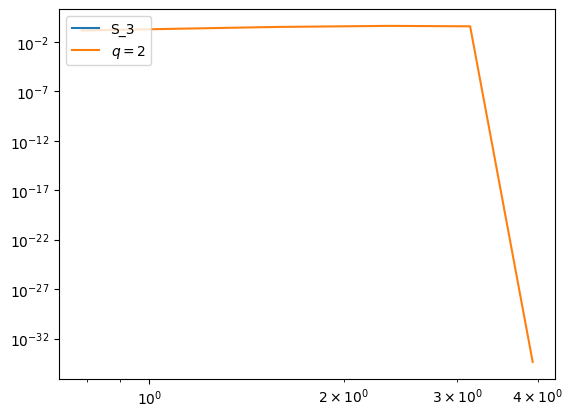

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import math
Mydatatype = "float64"

def structfn(ux, uy, sf):
    dux = np.zeros(Nby2, dtype=Mydatatype)
    duy = np.zeros(Nby2, dtype=Mydatatype)
    temp_arr = np.zeros(Nby2, dtype=Mydatatype)


    for lx in range(N[0]//2):
        for ly in range(N[1]//2):
            l_vec = (lx, ly)
            l_norm = np.linalg.norm(l_vec)
            l_ind = math.ceil(l_norm)

            dux = ux[lx:N[0]//2+lx, ly:N[1]//2+ly]-ux[0:N[0]//2, 0:N[1]//2]
            duy = uy[lx:N[0]//2+lx, ly:N[1]//2+ly]-uy[0:N[0]//2, 0:N[1]//2]
           # print(lx, ly, dux[0,0], duy[0,0], dux[1,1], duy[1,1])
            if (l_norm > 1e-5):
                temp_arr  =  (dux**2 + duy**2)*(dux*lx + duy*ly)/l_norm
            sf[0,l_ind]  +=  np.mean(temp_arr)

            for q in range(qmin,qmax+1):
                if (l_norm > 1e-5):
                    temp_arr  =  (dux*lx + duy*ly)/l_norm   
                sf[q-qmin+1,l_ind] += np.mean(temp_arr**q)



def vel_field(N, dx, dy, ux, uy):
    for i in range(N[0]):
        for j in range(N[1]):
            x = i*dx; y = j*dy 
       #     ux[i,j] = x
       #     uy[i,j] = y
            ux[i,j] = np.sin(x)*np.cos(y)
            uy[i,j] = -np.sin(y)*np.cos(x)

N = (8,8)
Nby2 = (N[0]//2, N[1]//2)
lmax = math.ceil(np.linalg.norm(N))//2
count = np.zeros(lmax, dtype=int)
qmin = 2
qmax = 2
Qdiff_p1 = qmax-qmin+2
sf = np.zeros((Qdiff_p1, lmax))

for i in range(N[0]//2):
    for j in range(N[1]//2):
        vec = np.array([i,j])
        ind = int(math.ceil(np.linalg.norm(vec)))
        count[ind] += 1

ux = np.ones(N, dtype=Mydatatype)
uy = np.ones(N, dtype=Mydatatype)

dx = dy = 2*np.pi/N[0]
vel_field(N, dx, dy, ux, uy)

xforsf = np.arange(lmax)*dx
print(lmax)
#print("ux = ",ux)
#print("uy = ",uy)
structfn(ux, uy, sf)
for l_loop in range(lmax):
    sf[:,l_loop] /= count[l_loop]

plt.figure()
plt.loglog(xforsf[1:], sf[0,1:], label='S_3')
for q in range(qmin,qmax+1):
    plt.loglog(xforsf[1:], sf[q-qmin+1,1:], label='$q = %i$' %q)

plt.legend(loc = 'upper left')
plt.savefig('numba2_py_hydro.png')
print(sf[:,1:5])


# 3D Python code

7
[ 0.          1.          3.          7.         12.13636364 19.
 27.        ] [  0.           1.           5.38306197  18.94750587  42.55848714
  83.11713866 140.29611541]


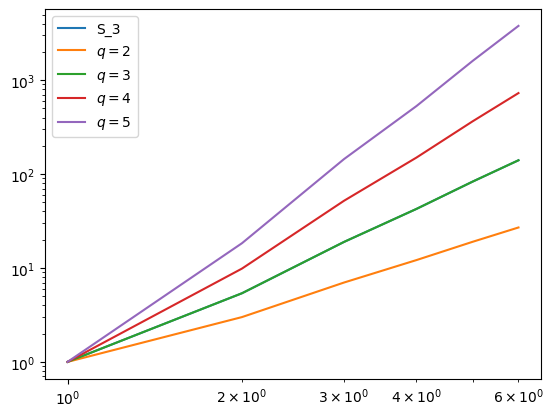

In [266]:
import numpy as np
import matplotlib.pyplot as plt
import math

def structfn(ux, uy, uz, sf):
    dux = np.zeros(Nby2, dtype=Mydatatype)
    duy = np.zeros(Nby2, dtype=Mydatatype)
    duz = np.zeros(Nby2, dtype=Mydatatype)
    temp_arr = np.zeros(Nby2, dtype=Mydatatype)

    for lx in range(N[0]//2):
        for ly in range(N[1]//2):
            for lz in range(N[2]//2):
                l_vec = (lx, ly, lz)
                l_norm = np.linalg.norm(l_vec)
                l_ind = math.ceil(l_norm)

                dux = ux[lx:N[0]//2+lx, ly:N[1]//2+ly, lz:N[2]//2+lz] \
                            -ux[0:N[0]//2, 0:N[1]//2, 0:N[2]//2]
                duy = uy[lx:N[0]//2+lx, ly:N[1]//2+ly, lz:N[2]//2+lz] \
                            -uy[0:N[0]//2, 0:N[1]//2, 0:N[2]//2]
                duz = uz[lx:N[0]//2+lx, ly:N[1]//2+ly, lz:N[2]//2+lz] \
                            -uz[0:N[0]//2, 0:N[1]//2, 0:N[2]//2]

                if (l_norm > 1e-5):
                    temp_arr  =  (dux**2 + duy**2 + duz**2) \
                                *(dux*lx + duy*ly + duz*lz)/l_norm
                sf[0,l_ind]  +=  np.mean(temp_arr)

                for q in range(qmin,qmax+1):
                    if (l_norm > 1e-5):
                        temp_arr  =  (dux*lx + duy*ly + duz*lz)/l_norm   
                    sf[q-qmin+1,l_ind] += np.mean(temp_arr**q)


N = (8,8,8)
Nby2 = (N[0]//2, N[1]//2, N[2]//2)
lmax = math.ceil(np.linalg.norm(N))//2
count = np.zeros(lmax, dtype=int)
qmin = 2
qmax = 3
Qdiff_p1 = qmax-qmin+2
sf = np.zeros((Qdiff_p1, lmax))

for i in range(N[0]//2):
    for j in range(N[1]//2):
        for k in range(N[2]//2):
            vec = np.array([i,j,k])
            ind = int(math.ceil(np.linalg.norm(vec)))
            count[ind] += 1

ux = np.ones(N, dtype=Mydatatype)
uy = np.ones(N, dtype=Mydatatype)
uz = np.ones(N, dtype=Mydatatype)
dx = dy = dz = 1
for i in range(N[0]):
    for j in range(N[1]):
        for k in range(N[2]):
            ux[i,j,k] = i*dx
            uy[i,j,k] = j*dy
            uz[i,j,k] = k*dz
xforsf = np.arange(lmax)*dx
print(lmax)

structfn(ux, uy, uz, sf)
for l_loop in range(lmax):
    sf[:,l_loop] /= count[l_loop]

plt.figure()
plt.loglog(xforsf[1:], sf[0,1:], label='S_3')
for q in range(qmin,qmax+1):
    plt.loglog(xforsf[1:], sf[q-qmin+1,1:], label='$q = %i$' %q)

plt.legend(loc = 'upper left')
plt.savefig('numba2.png')

print(sf[1,:], sf[2,:])

# 2D Numba CUDA (Global Mem)

(1, 1)


/home/mkv/.local/lib/python3.8/site-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


[[8.67361738e-19 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.46446609e-01 3.59764128e-34 0.00000000e+00 0.00000000e+00]]
sf_local in loop 0 = (  0 1 ) 2 0 0 1 0.500000 2.343146
sf_local in loop 0 = (  1 0 ) 2 0 0 1 0.500000 4.686292
sf_local in loop 0 = (  1 1 ) 2 0 0 2 0.000000 0.000000


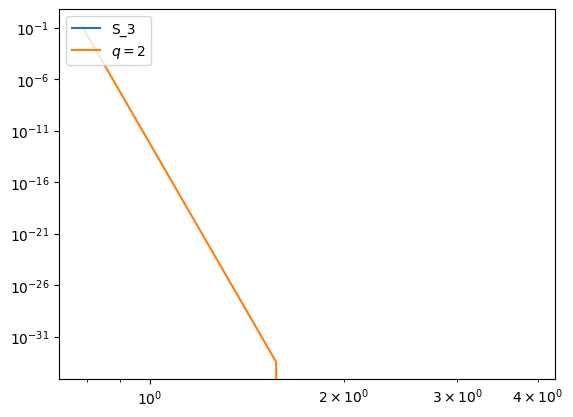

In [51]:
Mydatatype = "float64"
from numba import cuda, float64, int32
import numpy as np
import matplotlib.pyplot as plt
import math
import h5py as hp

TPB = (4,4)
##CUDA kernel
@cuda.jit
def structfn(N, ux, uy, sf):

    (i,j) = cuda.grid(2)
    local_r = (cuda.threadIdx.x, cuda.threadIdx.y)

    ux_loc = ux[i,j]
    uy_loc = uy[i,j]
    cuda.syncthreads()
 
    for lx in range(2): #range(N[0]//2):
        for ly in range(2): #range(N[1]//2):
            l_norm = math.sqrt(lx**2+ly**2)
            l_ind = int(math.ceil(l_norm))
            du_vec = (ux[i+lx,j+ly]- ux_loc, uy[i+lx,j+ly]- uy_loc)

            if l_norm > 1e-5:
                S3_loc = (du_vec[0]**2+du_vec[1]**2)* (du_vec[0]*lx+du_vec[1]*ly)/l_norm
            cuda.syncthreads()

            cuda.atomic.add(sf, (0,l_ind), S3_loc)
            cuda.syncthreads()

            if l_norm > 1e-5:
                du_dot_l = (du_vec[0]*lx+du_vec[1]*ly)/l_norm
            cuda.syncthreads()

            for q in range(qmin,qmax+1):
                cuda.atomic.add(sf, (q-qmin+1,l_ind), du_dot_l**q)
                if (lx==1 or ly==1) and local_r==(0,0):
                    print("sf_local in loop 0 = ( ",  lx, ly , ")", q, i, j, l_ind, du_dot_l**q, sf[q-qmin+1,l_ind])                     
            cuda.syncthreads()
         


def vel_field(N, dx, dy, ux, uy):
    for i in range(N[0]):
        for j in range(N[1]):
            x = i*dx; y = j*dy 
       #     ux[i,j] = x
       #     uy[i,j] = y
            ux[i,j] = np.sin(x)*np.cos(y)
            uy[i,j] = -np.sin(y)*np.cos(x)

### MAIN
N = (8,8)
Nby2 = (N[0]//2, N[1]//2)
lmax = math.ceil(np.linalg.norm(N))//2
count = np.zeros(lmax, dtype=int)
qmin = 2
qmax = 2
Qdiff_p1 = qmax-qmin+2
sf = np.zeros((Qdiff_p1, lmax))

for i in range(N[0]//2):
    for j in range(N[1]//2):
        vec = np.array([i,j])
        ind = int(math.ceil(np.linalg.norm(vec)))
        count[ind] += 1

ux = np.ones(N, dtype=Mydatatype)
uy = np.ones(N, dtype=Mydatatype)

dx = dy = 2*np.pi/N[0]
vel_field(N, dx, dy, ux, uy)

xforsf = np.arange(lmax)*dx


import math
BPG_x = math.ceil(N[0]/(2*TPB[0]))
BPG_y = math.ceil(N[1]/(2*TPB[1]))
BPG = (BPG_x, BPG_y)
print(BPG)
#Copy the arrays to the device
ux_global_mem = cuda.to_device(ux)
uy_global_mem = cuda.to_device(uy)
sf_global_mem = cuda.to_device(sf)

#start the kernel
structfn[BPG,TPB](N, ux_global_mem, uy_global_mem, sf_global_mem)

# Copy the result back to the host
sf = sf_global_mem.copy_to_host()

factor = N[0]*N[1]/4
for l_loop in range(lmax):
    sf[:,l_loop] /=  (factor*count[l_loop])

plt.figure()
plt.loglog(xforsf[1:], -0.5*sf[0,1:]/xforsf[1:], label='S_3')
for q in range(qmin,qmax+1):
    plt.loglog(xforsf[1:], sf[q-qmin+1,1:], label='$q = %i$' %q)

plt.legend(loc = 'upper left')
#plt.savefig('numba2_py_hydro.png')
print(sf[:,1:5])

# 2D Numba CUDA (Shared Mem)

(1, 1)


/home/mkv/.local/lib/python3.8/site-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


sf_local in loop 0 = (  0 0 ) 2 0 0.000000 0.000000
sf_local in loop 0 = (  0 1 ) 2 1 9.372583 0.146447
sf_local in loop 0 = (  1 0 ) 2 1 13.372583 0.355393
sf_local in loop 0 = (  1 1 ) 2 2 0.921573 0.014400
[[-6.93889390e-18 -4.44559058e-03  0.00000000e+00  0.00000000e+00]
 [ 1.77696609e-01  4.79985873e-03  0.00000000e+00  0.00000000e+00]]


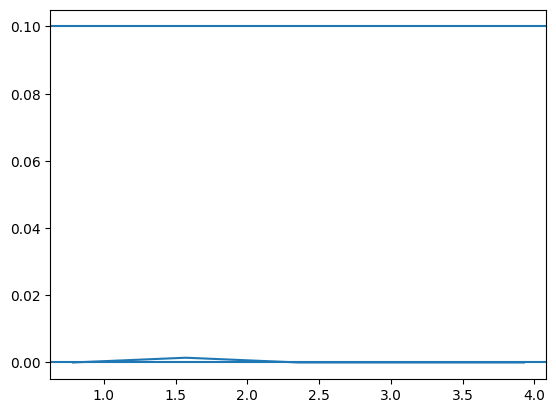

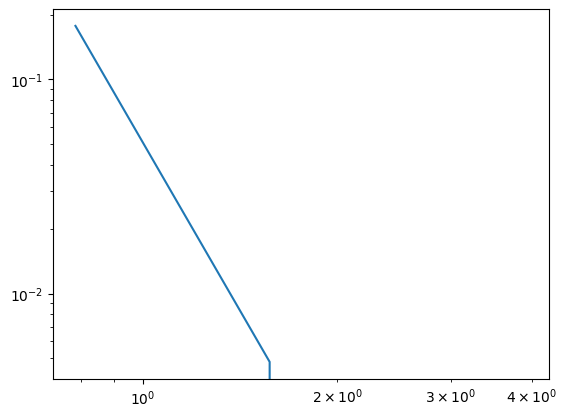

In [53]:
Mydatatype = "float64"
from numba import cuda, float64, int32
import numpy as np
import matplotlib.pyplot as plt
import math


TPB = (8,8)
TPB2 = (TPB[0]*2, TPB[1]*2)  # double elements along each dirn, for u'
normalization_const =  TPB[0]*TPB[1]
##CUDA kernel
@cuda.jit
def structfn(ux, uy, sf):

    ux_local = cuda.shared.array(TPB, dtype=Mydatatype)
    upx_local = cuda.shared.array(TPB2, dtype=Mydatatype)

    uy_local = cuda.shared.array(TPB, dtype=Mydatatype)
    upy_local = cuda.shared.array(TPB2, dtype=Mydatatype)
    du_dot_l_local = cuda.shared.array(TPB, dtype=Mydatatype)

    sf_local = cuda.shared.array(shape = (Qdiff_p1,lmax), dtype=Mydatatype)
    local_result = cuda.shared.array(shape = 1, dtype=Mydatatype)

    local_r = (cuda.threadIdx.x, cuda.threadIdx.y) #(x,y) in C
    block_id = (cuda.blockIdx.x, cuda.blockIdx.y)
    global_r = (cuda.blockIdx.x*TPB[0]+cuda.threadIdx.x, \
              cuda.blockIdx.y*TPB[1]+cuda.threadIdx.y)

    if (local_r == (0,0)):
        for i in range(ux_local.shape[0]):
            for j in range(ux_local.shape[1]):
                ux_local[i,j] = ux[cuda.blockIdx.x*TPB[0]+i, cuda.blockIdx.y*TPB[1]+j]
                uy_local[i,j] = uy[cuda.blockIdx.x*TPB[0]+i, cuda.blockIdx.y*TPB[1]+j]
                du_dot_l_local[i,j] = 0
             #   print(i,j, ux_local[i,j],uy_local[i,j])
    cuda.syncthreads()

    if (local_r == (0,0)):
        for q_ind in range(Qdiff_p1):
            for l_loop in range(lmax):
                sf_local[q_ind, l_loop] = 0.0
                sf[q_ind, l_loop] = 0.0
    cuda.syncthreads()

   # block_gap = np.zeros(2, dtype=int)
    block_gap = cuda.local.array(2, dtype=int32)

    for bpx_id in range(block_id[0],block_id[0]+BPG[0]):
        for bpy_id in range(block_id[1],block_id[1]+BPG[1]):
            block_gap[0] = bpx_id - block_id[0]
            block_gap[1] = bpy_id - block_id[1]
            if (local_r == (0,0)):
                for i in range(upx_local.shape[0]):
                    for j in range(upx_local.shape[1]):
                        upx_local[i,j] = ux[bpx_id*TPB[0]+i, bpy_id*TPB[1]+j]
                        upy_local[i,j] = uy[bpx_id*TPB[0]+i, bpy_id*TPB[1]+j]
            cuda.syncthreads()
 
            for local_lx in range(2): # range(TPB[0]):
              for local_ly in range(2): # range(TPB[1]):
                l = (local_lx + block_gap[0]*TPB[0], local_ly + block_gap[1]*TPB[1])
                l_norm = math.sqrt(l[0]**2+l[1]**2)
                l_ind = int(math.ceil(l_norm))
                local_r_uprime = (cuda.threadIdx.x+local_lx, cuda.threadIdx.y+local_ly)
                du_vec = (upx_local[local_r_uprime]-ux_local[local_r], \
                            upy_local[local_r_uprime]-uy_local[local_r])
            
                if l_norm > 1e-5:
                  du_dot_l_local[local_r] = (du_vec[0]*l[0]+du_vec[1]*l[1])/l_norm
                cuda.syncthreads()

                for q in range(qmin,qmax+1):
                    local_result[0] = 0
                    cuda.atomic.add(local_result,0,du_dot_l_local[local_r]**q)                    
                    if (local_r == (0,0)):
                        sf_local[q-qmin+1,l_ind] += local_result[0]/normalization_const
                        print("sf_local in loop 0 = ( ",  local_lx, local_ly, ")", q, l_ind, local_result[0],\
                               sf_local[q-qmin+1,l_ind])

                
                if l_norm > 1e-5:  # For S3
                  du_dot_l_local[local_r] = (du_vec[0]**2+du_vec[1]**2)* \
                        (du_vec[0]*l[0]+du_vec[1]*l[1])/l_norm
                cuda.syncthreads()

                local_result[0] = 0
                cuda.atomic.add(local_result,0,du_dot_l_local[local_r])
                if (local_r == (0,0)):
                    sf_local[0,l_ind] += local_result[0]/normalization_const
    
    if (local_r == (0,0)):
        for q_ind in range(Qdiff_p1):
            for l_loop in range(lmax):
             #   print("in final = ", by, bx, q_ind, l_loop, sf_local[q_ind,l_loop])
                cuda.atomic.add(sf, (q_ind,l_loop), sf_local[q_ind,l_loop])
    cuda.syncthreads()

    if global_r == (0,0):
        for q_ind in range(Qdiff_p1):
            for l_loop in range(lmax):
              sf[q_ind,l_loop] /= 1 #(BPG[0]*BPG[1])
           #   print("in final = ", q_ind, l_loop, sf[q_ind,l_loop]) 

#### END OF STR FN

def vel_field(N, dx, dy, ux, uy):
    for i in range(N[0]):
        for j in range(N[1]):
            x = i*dx; y = j*dy 
       #     ux[i,j] = x
       #     uy[i,j] = y
            ux[i,j] = np.sin(x)*np.cos(y)
            uy[i,j] = -np.sin(y)*np.cos(x)

# MAIN
#cuda.select_device(0)  # Select the first GPU
#device = cuda.current_context().device
#print(f"Using GPU: {device.name}")
#print(f"Total shared memory per block: {device.MAX_SHARED_MEMORY_PER_BLOCK}")

N = (8,8)
lmax = math.ceil(np.linalg.norm(N))//2
count = np.zeros(lmax, dtype=int)
qmin = 2
qmax = 2
Qdiff_p1 = qmax-qmin+2
sf = np.zeros((Qdiff_p1, lmax))

for i in range(N[0]//2):
    for j in range(N[1]//2):
        vec = np.array([i,j])
        ind = int(math.ceil(np.linalg.norm(vec)))
        count[ind] += 1
#        print("count ", i, j, ind, count[ind])

ux = np.ones(N, dtype=Mydatatype)
uy = np.ones(N, dtype=Mydatatype)

dx = dy = 2*np.pi/N[0]
vel_field(N, dx, dy, ux, uy)
xforsf = np.arange(lmax)*dx

import math
BPG_x = math.ceil(N[0]/(2*TPB[0]))
BPG_y = math.ceil(N[1]/(2*TPB[1]))
BPG = (BPG_x, BPG_y)
print(BPG)
#Copy the arrays to the device
ux_global_mem = cuda.to_device(ux)
uy_global_mem = cuda.to_device(uy)
sf_global_mem = cuda.to_device(sf)

#start the kernel
structfn[BPG,TPB](ux_global_mem, uy_global_mem, sf_global_mem)


# Copy the result back to the host
sf = sf_global_mem.copy_to_host()

for l_loop in range(lmax):
    sf[:,l_loop] /=  (count[l_loop])


plt.figure()
plt.plot(xforsf[1:], -0.5*sf[0,1:]/xforsf[1:], label='S_3p')
plt.axhline(y=0)
plt.axhline(y=0.1)
# for q in range(qmin,qmax+1):
#     plt.loglog(xforsf[1:], sf_p[q-qmin+1,1:], label='$q = %i$' %q)
#     plt.loglog(xforsf[1:], sf_m[q-qmin+1,1:], label='$q = %i$' %q)


plt.figure()
#plt.loglog(xforsf[1:], sf[0,1:], label='S_3')
for q in range(qmin,qmax+1):
    plt.loglog(xforsf[1:], sf[q-qmin+1,1:], label='$q = %i$' %q)

print(sf[:,1:5])
#plt.legend(loc = 'upper left')
#plt.savefig('numba2.png')


# 3D Numba CUDA (GLOBAL MEM)

In [ ]:
Mydatatype = "float64"
from numba import cuda, float64, int32
import numpy as np
import matplotlib.pyplot as plt
import math
import h5py as hp

TPB = (8,8,8)
##CUDA kernel
@cuda.jit
def structfn(N, ux, uy, uz, sf):

    (i,j,k) = cuda.grid(3)
  
    ux_loc = ux[i,j,k]
    uy_loc = uy[i,j,k]
    uz_loc = uz[i,j,k]
    cuda.syncthreads()
 
    for lx in range(N[0]//2):
        for ly in range(N[1]//2):
            for lz in range(N[2]//2):
                l_norm = math.sqrt(lx**2+ ly**2+ lz**2)
                l_ind = int(math.ceil(l_norm))
                du_vec = (ux[i+lx,j+ly,k+lz]- ux_loc, uy[i+lx,j+ly,k+lz]- uy_loc, uz[i+lx,j+ly,k+lz]- uz_loc) 

                if l_norm > 1e-5:
                    S3_loc = (du_vec[0]**2+ du_vec[1]**2+ du_vec[2]**2)* \
                             (du_vec[0]*lx+ du_vec[1]*ly+ du_vec[2]*lz)/l_norm
                cuda.syncthreads()

                cuda.atomic.add(sf, (0,l_ind), S3_loc)
                cuda.syncthreads() 

                if l_norm > 1e-5:
                    du_dot_l = (du_vec[0]*lx+ du_vec[1]*ly+ du_vec[2]*lz)/l_norm
                cuda.syncthreads()

                for q in range(qmin,qmax+1):
                    cuda.atomic.add(sf, (q-qmin+1,l_ind), du_dot_l**q)                     
                cuda.syncthreads()
         


N = (8,8,8)
lmax = math.ceil(np.linalg.norm(N))//2
count = np.zeros(lmax, dtype=int)
qmin = 2
qmax = 3
Qdiff_p1 = qmax-qmin+2
sf = np.zeros((Qdiff_p1, lmax))

for i in range(N[0]//2):
    for j in range(N[1]//2):
        for k in range(N[2]//2):
            vec = np.array([i,j,k])
            ind = int(math.ceil(np.linalg.norm(vec)))
            count[ind] += 1


ux = np.ones(N, dtype=Mydatatype)
uy = np.ones(N, dtype=Mydatatype)
uz = np.ones(N, dtype=Mydatatype)
dx = dy = dz = 1
for i in range(N[0]):
    for j in range(N[1]):
        for k in range(N[2]):
            ux[i,j,k] = i*dx
            uy[i,j,k] = j*dy
            uz[i,j,k] = k*dz
        #    print("main ", i, j, k, ux[i,j,k], uy[i,j,k], uz[i,j,k])

xforsf = np.arange(lmax)*dx

import math
BPG_x = math.ceil(N[0]/(2*TPB[0]))
BPG_y = math.ceil(N[1]/(2*TPB[1]))
BPG_z = math.ceil(N[2]/(2*TPB[2]))
BPG = (BPG_x, BPG_y, BPG_z)
#Copy the arrays to the device
ux_global_mem = cuda.to_device(ux)
uy_global_mem = cuda.to_device(uy)
uz_global_mem = cuda.to_device(uz)
sf_global_mem = cuda.to_device(sf)


#start the kernel
structfn[BPG,TPB](N, ux_global_mem, uy_global_mem, uz_global_mem, sf_global_mem)

# Copy the result back to the host
sf = sf_global_mem.copy_to_host()

factor = N[0]*N[1]*N[2]/8
for l_loop in range(lmax):
    sf[:,l_loop] /=  (factor*count[l_loop])
#print(sf[1,:], sf[2,:])

plt.figure()
plt.semilogx(xforsf[1:], sf[0,1:]/xforsf[1:], label='S_3')

for q in range(qmin,qmax+1):
    plt.loglog(xforsf[1:], sf[q-qmin+1,1:], label='$q = %i$' %q)

plt.legend(loc = 'upper left')
#plt.savefig('numba2_3d_hydro.png')



# 3D Numba CUDA (SHARED MEM)

/home/phyguest/.local/lib/python3.8/site-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


[   0.   96.  672. 4032. 8544. 7296.  864.] [    0.            99.          1226.8058815  11039.76338205
 30228.17494556 32144.98124612  4516.47569322]


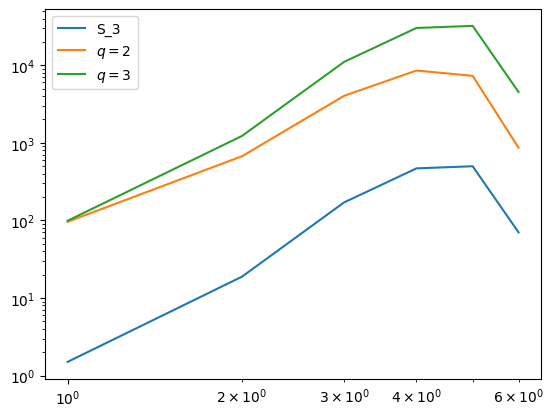

In [275]:
Mydatatype = "float64"
from numba import cuda, float64, int32
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
import math


TPB = (4,4,4)
TPB2 = (TPB[0]*2, TPB[1]*2, TPB[2]*2)  # double elements along each dirn, for u'
normalization_const =  TPB[0]*TPB[1]*TPB[2]
##CUDA kernel
@cuda.jit
def structfn(ux, uy, uz, sf):

    ux_local = cuda.shared.array(TPB, dtype=Mydatatype)
    upx_local = cuda.shared.array(TPB2, dtype=Mydatatype)

    uy_local = cuda.shared.array(TPB, dtype=Mydatatype)
    upy_local = cuda.shared.array(TPB2, dtype=Mydatatype)

    uz_local = cuda.shared.array(TPB, dtype=Mydatatype)
    upz_local = cuda.shared.array(TPB2, dtype=Mydatatype)

    du_dot_l_local = cuda.shared.array(TPB, dtype=Mydatatype)

    sf_local = cuda.shared.array(shape = (Qdiff_p1,lmax), dtype=Mydatatype)
    local_result = cuda.shared.array(shape = 1, dtype=Mydatatype)

    local_r = (cuda.threadIdx.x, cuda.threadIdx.y, cuda.threadIdx.z) #(x,y) in C
    block_id = (cuda.blockIdx.x, cuda.blockIdx.y, cuda.blockIdx.z)
    global_r = (cuda.blockIdx.x*TPB[0]+cuda.threadIdx.x, \
                cuda.blockIdx.y*TPB[1]+cuda.threadIdx.y, \
                cuda.blockIdx.y*TPB[1]+cuda.threadIdx.y)

    if (local_r == (0,0,0)):
       for i in range(ux_local.shape[0]):
          for j in range(ux_local.shape[1]):
            for k in range(ux_local.shape[2]):
                ux_local[i,j,k] = ux[cuda.blockIdx.x*TPB[0]+i,  \
                    cuda.blockIdx.y*TPB[1]+j, cuda.blockIdx.z*TPB[2]+k]
                uy_local[i,j,k] = uy[cuda.blockIdx.x*TPB[0]+i,  \
                    cuda.blockIdx.y*TPB[1]+j, cuda.blockIdx.z*TPB[2]+k]
                uz_local[i,j,k] = uz[cuda.blockIdx.x*TPB[0]+i,  \
                    cuda.blockIdx.y*TPB[1]+j, cuda.blockIdx.z*TPB[2]+k]    

                du_dot_l_local[i,j] = 0
            #    print(i,j,k, ux[i,j,k], uy[i,j,k], uz[i,j,k], ux_local[i,j,k],uy_local[i,j,k],uz_local[i,j,k])
    cuda.syncthreads()
    #print(0,0,0,uy_local[i,j,k])

    if (local_r == (0,0,0)):
        for q_ind in range(Qdiff_p1):
            for l_loop in range(lmax):
                sf_local[q_ind, l_loop] = 0.0
                sf[q_ind, l_loop] = 0.0
    cuda.syncthreads()

   # block_gap = np.zeros(2, dtype=int)
    block_gap = cuda.local.array(3, dtype=int32)

    for bpx_id in range(block_id[0],block_id[0]+BPG[0]):
      for bpy_id in range(block_id[1],block_id[1]+BPG[1]):
        for bpz_id in range(block_id[2],block_id[2]+BPG[2]):
            block_gap[0] = bpx_id - block_id[0]
            block_gap[1] = bpy_id - block_id[1]
            block_gap[2] = bpz_id - block_id[2]
            if (local_r == (0,0,0)):
              for i in range(upx_local.shape[0]):
                for j in range(upx_local.shape[1]):
                    for k in range(upx_local.shape[2]):
                        upx_local[i,j,k] = ux[bpx_id*TPB[0]+i, bpy_id*TPB[1]+j, bpz_id*TPB[2]+k]
                        upy_local[i,j,k] = uy[bpx_id*TPB[0]+i, bpy_id*TPB[1]+j, bpz_id*TPB[2]+k]
                        upz_local[i,j,k] = uz[bpx_id*TPB[0]+i, bpy_id*TPB[1]+j, bpz_id*TPB[2]+k]
                    #    print("u' = ", i, j, k, upx_local[i,j,k], upy_local[i,j,k], upz_local[i,j,k])
            cuda.syncthreads()

            for local_lx in range(TPB[0]):
              for local_ly in range(TPB[1]):
                for local_lz in range(TPB[2]):
                    l = (local_lx + block_gap[0]*TPB[0], local_ly + block_gap[1]*TPB[1], \
                         local_lz + block_gap[2]*TPB[2])
                    l_norm = math.sqrt(l[0]**2 +l[1]**2 +l[2]**2)
                    l_ind = int(math.ceil(l_norm))
                    local_r_uprime = (cuda.threadIdx.x+local_lx, cuda.threadIdx.y+local_ly, \
                                        cuda.threadIdx.z+local_lz)
                    du_vec = (upx_local[local_r_uprime]-ux_local[local_r], \
                                upy_local[local_r_uprime]-uy_local[local_r], \
                                upz_local[local_r_uprime]-uz_local[local_r])
                
                    if l_norm > 1e-5:
                        du_dot_l_local[local_r] = (du_vec[0]*l[0]+ du_vec[1]*l[1]+ du_vec[2]*l[2])/l_norm
                    cuda.syncthreads()

                    for q in range(qmin,qmax+1):
                        local_result[0] = 0
                        cuda.atomic.add(local_result,0,du_dot_l_local[local_r]**q)                    
                        if (local_r == (0,0,0)):
                            sf_local[q-qmin+1,l_ind] += local_result[0] #/normalization_const
                    
                    if l_norm > 1e-5:  # For S3
                        du_dot_l_local[local_r] = (du_vec[0]**2+ du_vec[1]**2+ du_vec[2]**2)* \
                            (du_vec[0]*l[0]+ du_vec[1]*l[1]+ du_vec[2]*l[2])/l_norm
                    cuda.syncthreads()

                    local_result[0] = 0
                    cuda.atomic.add(local_result,0,du_dot_l_local[local_r])
                    if (local_r == (0,0,0)):
                        sf_local[0,l_ind] += local_result[0]/normalization_const
                
    if (local_r == (0,0,0)):
        for q_ind in range(Qdiff_p1):
            for l_loop in range(lmax):
             #   print("in final = ", by, bx, q_ind, l_loop, sf_local[q_ind,l_loop])
                cuda.atomic.add(sf, (q_ind,l_loop), sf_local[q_ind,l_loop])
    cuda.syncthreads()

    if global_r == (0,0,0):
        for q_ind in range(Qdiff_p1):
            for l_loop in range(lmax):
              sf[q_ind,l_loop] /= 1 #(BPG[0]*BPG[1])
           #   print("in final = ", q_ind, l_loop, sf[q_ind,l_loop]) 

# MAIN
#cuda.select_device(0)  # Select the first GPU
#device = cuda.current_context().device
#print(f"Using GPU: {device.name}")
#print(f"Total shared memory per block: {device.MAX_SHARED_MEMORY_PER_BLOCK}")

N = (8,8,8)
lmax = math.ceil(np.linalg.norm(N))//2
count = np.zeros(lmax, dtype=int)
qmin = 2
qmax = 3
Qdiff_p1 = qmax-qmin+2
sf = np.zeros((Qdiff_p1, lmax))

for i in range(N[0]//2):
    for j in range(N[1]//2):
        for k in range(N[2]//2):
            vec = np.array([i,j,k])
            ind = int(math.ceil(np.linalg.norm(vec)))
            count[ind] += 1


ux = np.ones(N, dtype=Mydatatype)
uy = np.ones(N, dtype=Mydatatype)
uz = np.ones(N, dtype=Mydatatype)
dx = dy = dz = 1
for i in range(N[0]):
    for j in range(N[1]):
        for k in range(N[2]):
            ux[i,j,k] = i*dx
            uy[i,j,k] = j*dy
            uz[i,j,k] = k*dz
        #    print("main ", i, j, k, ux[i,j,k], uy[i,j,k], uz[i,j,k])

xforsf = np.arange(lmax)*dx

import math
BPG_x = math.ceil(N[0]/(2*TPB[0]))
BPG_y = math.ceil(N[1]/(2*TPB[1]))
BPG_z = math.ceil(N[2]/(2*TPB[2]))
BPG = (BPG_x, BPG_y, BPG_z)
#Copy the arrays to the device
ux_global_mem = cuda.to_device(ux)
uy_global_mem = cuda.to_device(uy)
uz_global_mem = cuda.to_device(uz)
sf_global_mem = cuda.to_device(sf)


#start the kernel
structfn[BPG,TPB](ux_global_mem, uy_global_mem, uz_global_mem, sf_global_mem)

# Copy the result back to the host
sf = sf_global_mem.copy_to_host()
#print("before = ",sf[2,:])
for l_loop in range(lmax):
    sf[:,l_loop] /= 1 #count[l_loop]
#print(xforsf)
print(sf[1,:], sf[2,:])

plt.figure()
plt.loglog(xforsf[1:], sf[0,1:], label='S_3')
for q in range(qmin,qmax+1):
    plt.loglog(xforsf[1:], sf[q-qmin+1,1:], label='$q = %i$' %q)

plt.legend(loc = 'upper left')
#plt.savefig('numba2.png')


